In [49]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt

## Read Meta-dataset and dataset meta-features

In [2]:
# read metadataset
metadataset_df = pd.read_csv("../TabSurvey/metadataset_v0.csv")

In [4]:
metadataset_df.head()

,results_bucket_path,dataset_fold_id,dataset_name,alg_name,hparam_source,trial_number,alg_hparam_id,exp_name,time__train,Log Loss__train,...,AUC__test,Accuracy__test,F1__test,time__train-eval,MSE__train,R2__train,MSE__val,R2__val,MSE__test,R2__test
0,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,CatBoost,default,0,CatBoost__seed_0__trial_0,gpu-expt-a_091822_065111_fdd9.zip,4.039096,0.018501,...,0.994533,0.993421,0.993421,0.185535,NaN,NaN,NaN,NaN,NaN,NaN
1,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,CatBoost,random_1_s0,1,CatBoost__seed_0__trial_1,gpu-expt-a_091822_065111_fdd9.zip,3.624039,0.011968,...,0.995148,0.994605,0.994605,0.129900,NaN,NaN,NaN,NaN,NaN,NaN
2,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,CatBoost,random_10_s0,10,CatBoost__seed_0__trial_10,gpu-expt-a_091822_065111_fdd9.zip,2.494685,0.022589,...,0.993307,0.990921,0.990921,0.074099,NaN,NaN,NaN,NaN,NaN,NaN
3,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,CatBoost,random_11_s0,11,CatBoost__seed_0__trial_11,gpu-expt-a_091822_065111_fdd9.zip,2.532277,0.028515,...,0.989220,0.990132,0.990132,0.061874,NaN,NaN,NaN,NaN,NaN,NaN
4,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,CatBoost,random_12_s0,12,CatBoost__seed_0__trial_12,gpu-expt-a_091822_065111_fdd9.zip,4.220030,0.015119,...,0.994578,0.993684,0.993684,0.121606,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# read dataset metafeatures
metafeatures_df = pd.read_csv("../TabSurvey/metafeatures.csv")

In [6]:
tuned_alg_perf = metadataset_df.loc[metadataset_df.groupby(["alg_name", "dataset_fold_id"])["Accuracy__val"].idxmax().dropna()]
tuned_alg_perf

,results_bucket_path,dataset_fold_id,dataset_name,alg_name,hparam_source,trial_number,alg_hparam_id,exp_name,time__train,Log Loss__train,...,AUC__test,Accuracy__test,F1__test,time__train-eval,MSE__train,R2__train,MSE__val,R2__val,MSE__test,R2__test
20.0,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,CatBoost,random_27_s0,27,CatBoost__seed_0__trial_27,gpu-expt-a_091822_065111_fdd9.zip,5.285700,0.012935,...,0.990643,0.994211,0.994211,0.146698,NaN,NaN,NaN,NaN,NaN,NaN
150.0,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_1,openml__APSFailure__168868,CatBoost,random_3_s0,3,CatBoost__seed_0__trial_3,gpu-expt-a_091822_065111_fdd9.zip,3.450149,0.011320,...,0.988862,0.992105,0.992105,0.140466,NaN,NaN,NaN,NaN,NaN,NaN
282.0,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_2,openml__APSFailure__168868,CatBoost,random_8_s0,8,CatBoost__seed_0__trial_8,gpu-expt-a_091822_065111_fdd9.zip,11.938921,0.007183,...,0.995551,0.993421,0.993421,0.173912,NaN,NaN,NaN,NaN,NaN,NaN
394.0,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_3,openml__APSFailure__168868,CatBoost,random_20_s0,20,CatBoost__seed_0__trial_20,gpu-expt-a_091822_065111_fdd9.zip,7.538957,0.011646,...,0.991612,0.994868,0.994868,0.179523,NaN,NaN,NaN,NaN,NaN,NaN
536.0,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_4,openml__APSFailure__168868,CatBoost,random_8_s0,8,CatBoost__seed_0__trial_8,gpu-expt-a_091822_065111_fdd9.zip,11.805938,0.007725,...,0.989614,0.995658,0.995658,0.179625,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191448.0,results/openml__wilt__146820/XGBoost/gpu-expt-...,openml__wilt__146820__fold_5,openml__wilt__146820,XGBoost,default,0,XGBoost__seed_0__trial_0,gpu-expt-a_091722_220903_21b9.zip,0.142135,0.039770,...,0.955786,0.983471,0.983471,0.006239,NaN,NaN,NaN,NaN,NaN,NaN
191671.0,results/openml__wilt__146820/XGBoost/gpu-expt-...,openml__wilt__146820__fold_6,openml__wilt__146820,XGBoost,random_22_s0,22,XGBoost__seed_0__trial_22,gpu-expt-a_091722_220903_21b9.zip,0.116242,0.022093,...,0.997229,0.985537,0.985537,0.003031,NaN,NaN,NaN,NaN,NaN,NaN
191865.0,results/openml__wilt__146820/XGBoost/gpu-expt-...,openml__wilt__146820__fold_7,openml__wilt__146820,XGBoost,random_1_s0,1,XGBoost__seed_0__trial_1,gpu-expt-a_091722_220903_21b9.zip,0.235586,0.032988,...,0.996977,0.983471,0.983471,0.006548,NaN,NaN,NaN,NaN,NaN,NaN
192092.0,results/openml__wilt__146820/XGBoost/gpu-expt-...,openml__wilt__146820__fold_8,openml__wilt__146820,XGBoost,random_27_s0,27,XGBoost__seed_0__trial_27,gpu-expt-a_091722_220903_21b9.zip,0.120812,0.016541,...,0.994732,0.991736,0.991736,0.005032,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
tuned_alg_perf["alg_name"].unique()

array(['CatBoost', 'KNN', 'LinearModel', 'MLP', 'SVM', 'TabNet',
       'XGBoost'], dtype=object)

In [8]:
def alg_pair_corrs(alg_pair):
    perf_pair = [tuned_alg_perf[tuned_alg_perf["alg_name"] == alg].set_index("dataset_fold_id") for alg in alg_pair]
    delta = perf_pair[0]["Accuracy__test"] - perf_pair[1]["Accuracy__test"]
    delta = delta.loc[perf_pair[0].index.intersection(perf_pair[1].index)]
    delta.name = "delta_perf"

    delta_mf = metafeatures_df.merge(delta, left_on="dataset_name", right_index=True, how='right')
    corr_columns = [col_name for col_name in metafeatures_df if col_name.startswith("f__")]
    return delta_mf[corr_columns].corrwith(delta_mf["delta_perf"]).sort_values(ascending=False)

In [9]:
alg_pair_corrs(["TabNet", "XGBoost"]).iloc[:20]

f__pymfe.info-theory.mut_inf.histogram.0         0.357294
f__pymfe.relative.linear_discr.quantiles.0       0.320625
f__pymfe.landmarking.linear_discr.min            0.320625
f__pymfe.relative.linear_discr.min               0.320625
f__pymfe.landmarking.linear_discr.quantiles.0    0.320625
f__pymfe.statistical.h_mean.skewness             0.314835
f__pymfe.statistical.g_mean.skewness             0.310699
f__pymfe.relative.linear_discr.quantiles.1       0.302634
f__pymfe.landmarking.linear_discr.quantiles.1    0.302634
f__pymfe.relative.linear_discr.quantiles.2       0.297764
f__pymfe.landmarking.linear_discr.median         0.297764
f__pymfe.relative.linear_discr.median            0.297764
f__pymfe.landmarking.linear_discr.quantiles.2    0.297764
f__pymfe.landmarking.linear_discr.mean           0.297143
f__pymfe.relative.linear_discr.mean              0.297143
f__pymfe.statistical.cor.quantiles.3             0.286904
f__pymfe.landmarking.linear_discr.quantiles.3    0.286033
f__pymfe.relat

In [12]:
alg_pair_corrs([ "CatBoost", "TabNet"]).iloc[:20]

f__pymfe.statistical.g_mean.quantiles.1        0.522814
f__pymfe.statistical.h_mean.quantiles.1        0.521762
f__pymfe.statistical.cor.skewness              0.521639
f__pymfe.info-theory.attr_conc.iq_range        0.516244
f__pymfe.statistical.g_mean.kurtosis           0.511581
f__pymfe.statistical.h_mean.kurtosis           0.511197
f__pymfe.info-theory.mut_inf.median            0.510311
f__pymfe.info-theory.mut_inf.quantiles.2       0.510311
f__pymfe.info-theory.mut_inf.quantiles.1       0.508824
f__pymfe.info-theory.class_conc.quantiles.1    0.504558
f__pymfe.statistical.cor.kurtosis              0.502350
f__pymfe.info-theory.mut_inf.mean              0.489640
f__pymfe.info-theory.mut_inf.quantiles.0       0.487613
f__pymfe.info-theory.mut_inf.min               0.487613
f__pymfe.info-theory.mut_inf.quantiles.3       0.462966
f__pymfe.statistical.h_mean.quantiles.2        0.462166
f__pymfe.statistical.h_mean.median             0.462166
f__pymfe.info-theory.class_conc.min            0

In [10]:
alg_pair_corrs([ "XGBoost", "TabNet"]).iloc[:20]

f__pymfe.info-theory.mut_inf.quantiles.1       0.459457
f__pymfe.statistical.cor.skewness              0.455639
f__pymfe.info-theory.mut_inf.quantiles.2       0.454131
f__pymfe.info-theory.mut_inf.median            0.454131
f__pymfe.info-theory.attr_conc.iq_range        0.452956
f__pymfe.info-theory.class_conc.quantiles.1    0.451030
f__pymfe.statistical.h_mean.kurtosis           0.448444
f__pymfe.statistical.g_mean.kurtosis           0.447889
f__pymfe.info-theory.mut_inf.quantiles.0       0.441225
f__pymfe.info-theory.mut_inf.min               0.441225
f__pymfe.statistical.g_mean.quantiles.1        0.426127
f__pymfe.statistical.h_mean.quantiles.1        0.425991
f__pymfe.info-theory.attr_conc.histogram.5     0.423950
f__pymfe.info-theory.mut_inf.mean              0.421687
f__pymfe.statistical.cor.kurtosis              0.398830
f__pymfe.info-theory.mut_inf.quantiles.3       0.396933
f__pymfe.info-theory.class_conc.quantiles.0    0.389180
f__pymfe.info-theory.class_conc.min            0

In [11]:
alg_pair_corrs(["TabNet", "KNN"]).iloc[:20]

f__pymfe.info-theory.joint_ent.histogram.9    0.505297
f__pymfe.info-theory.attr_ent.histogram.9     0.491769
f__pymfe.info-theory.attr_conc.histogram.1    0.455353
f__pymfe.statistical.t_mean.sd                0.404460
f__pymfe.statistical.mad.sd                   0.404310
f__pymfe.statistical.median.sd                0.404221
f__pymfe.statistical.iq_range.sd              0.403375
f__pymfe.statistical.mean.sd                  0.403134
f__pymfe.statistical.cov.sd                   0.396254
f__pymfe.statistical.mad.mean                 0.395190
f__pymfe.statistical.cov.quantiles.4          0.394727
f__pymfe.statistical.cov.max                  0.394727
f__pymfe.statistical.cov.range                0.394727
f__pymfe.statistical.iq_range.mean            0.394684
f__pymfe.statistical.cov.mean                 0.394636
f__pymfe.statistical.median.range             0.394540
f__pymfe.statistical.median.max               0.394458
f__pymfe.statistical.median.quantiles.4       0.394458
f__pymfe.s

In [107]:
alg_pair_corrs(["KNN", "SVM"]).iloc[:20]

f__pymfe.info-theory.attr_ent.iq_range               0.376566
f__pymfe.info-theory.joint_ent.iq_range              0.348977
f__pymfe.relative.best_node.skewness.relative        0.336814
f__pymfe.landmarking.best_node.skewness.relative     0.336814
f__pymfe.info-theory.attr_conc.histogram.0           0.276000
f__pymfe.info-theory.attr_ent.histogram.2            0.275997
f__pymfe.statistical.w_lambda                        0.262866
f__pymfe.statistical.max.quantiles.1                 0.251909
f__pymfe.info-theory.mut_inf.histogram.5             0.246513
f__pymfe.statistical.can_cor.histogram.5             0.246308
f__pymfe.statistical.max.min                         0.243787
f__pymfe.statistical.max.quantiles.0                 0.243787
f__pymfe.info-theory.joint_ent.skewness              0.242400
f__pymfe.info-theory.class_conc.histogram.3          0.240900
f__pymfe.general.freq_class.sd                       0.240678
f__pymfe.info-theory.class_conc.histogram.2          0.239549
f__pymfe

In [66]:
all_pair_corrs = []

max_corrs = []
for alg_pair in itertools.combinations(tuned_alg_perf["alg_name"].unique(), 2):
    pair_corr = alg_pair_corrs(alg_pair)
    pair_corr.name = "{}-{}".format(*alg_pair)
    all_pair_corrs.append(pair_corr)
    max_corrs += [
        {"pair": alg_pair, "max": pair_corr.abs().max(), "idxmax": pair_corr.abs().idxmax()},
        {"pair": (alg_pair[1], alg_pair[0]), "max": pair_corr.abs().max(), "idxmax": pair_corr.abs().idxmax()},
        #{"pair": (alg_pair[1], alg_pair[0]), "max": -pair_corr.min(), "idxmax": pair_corr.idxmin()},
    ]
all_pair_corrs = pd.concat(all_pair_corrs, axis=1).T

max_corrs = pd.DataFrame(max_corrs).set_index("pair")
max_corrs.index = pd.MultiIndex.from_tuples(max_corrs.index)

In [67]:
max_corrs

,,max,idxmax
CatBoost,KNN,0.421300,f__pymfe.landmarking.one_nn.quantiles.4
KNN,CatBoost,0.421300,f__pymfe.landmarking.one_nn.quantiles.4
CatBoost,LinearModel,0.592453,f__pymfe.statistical.can_cor.skewness
LinearModel,CatBoost,0.592453,f__pymfe.statistical.can_cor.skewness
CatBoost,MLP,0.676776,f__pymfe.info-theory.mut_inf.quantiles.3
MLP,CatBoost,0.676776,f__pymfe.info-theory.mut_inf.quantiles.3
CatBoost,SVM,0.562556,f__pymfe.statistical.median.sd
SVM,CatBoost,0.562556,f__pymfe.statistical.median.sd
CatBoost,TabNet,0.522814,f__pymfe.statistical.g_mean.quantiles.1
TabNet,CatBoost,0.522814,f__pymfe.statistical.g_mean.quantiles.1


In [68]:
comp_matrix = max_corrs["max"].unstack()
comp_matrix

,CatBoost,KNN,LinearModel,MLP,SVM,TabNet,XGBoost
CatBoost,NaN,0.421300,0.592453,0.676776,0.562556,0.522814,0.324986
KNN,0.421300,NaN,0.513520,0.608845,0.461292,0.505297,0.444838
LinearModel,0.592453,0.513520,NaN,0.573212,0.630698,0.578845,0.549466
MLP,0.676776,0.608845,0.573212,NaN,0.641512,0.479655,0.596258
SVM,0.562556,0.461292,0.630698,0.641512,NaN,0.565046,0.553119
TabNet,0.522814,0.505297,0.578845,0.479655,0.565046,NaN,0.459457
XGBoost,0.324986,0.444838,0.549466,0.596258,0.553119,0.459457,NaN


In [69]:
def plot_matrix(matrix, cmap='viridis'):
    cellsize = 5
    fig, ax = plt.subplots(1,1,figsize=(cellsize*1.2, cellsize*matrix.shape[0]/matrix.shape[1]))
    im = ax.pcolormesh(matrix, edgecolor='k', linewidth=0.5, cmap=cmap) 
    plt.gca().invert_yaxis()
    ax.set_xticks([])
    ax.set_xticklabels('')
    ax.set_xticks([c+0.5 for c in range(matrix.shape[0]-0)], minor=True)

    ax.set_xticklabels(matrix.columns, minor=True, rotation=90)
    ax.set_yticks([])
    ax.set_yticklabels('')    
    ax.set_yticks([c+0.5 for c in range(matrix.shape[1]-0)], minor=True)
    ax.set_yticklabels(matrix.index, minor=True)
    fig.colorbar(im, ax=ax)

In [70]:
comp_matrix

,CatBoost,KNN,LinearModel,MLP,SVM,TabNet,XGBoost
CatBoost,NaN,0.421300,0.592453,0.676776,0.562556,0.522814,0.324986
KNN,0.421300,NaN,0.513520,0.608845,0.461292,0.505297,0.444838
LinearModel,0.592453,0.513520,NaN,0.573212,0.630698,0.578845,0.549466
MLP,0.676776,0.608845,0.573212,NaN,0.641512,0.479655,0.596258
SVM,0.562556,0.461292,0.630698,0.641512,NaN,0.565046,0.553119
TabNet,0.522814,0.505297,0.578845,0.479655,0.565046,NaN,0.459457
XGBoost,0.324986,0.444838,0.549466,0.596258,0.553119,0.459457,NaN


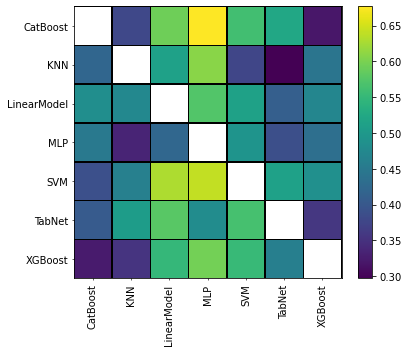

In [64]:
plot_matrix(comp_matrix)

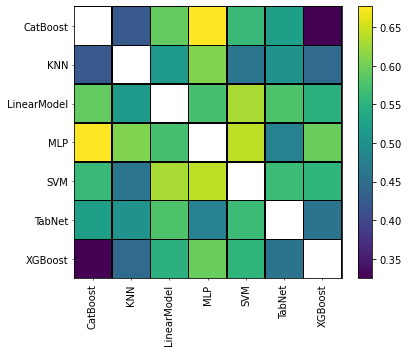

In [71]:
plot_matrix(comp_matrix)

In [34]:
pair_corr.idxmax()

'f__pymfe.info-theory.mut_inf.histogram.0'

In [31]:
df = pd.DataFrame([
    {'try': (1, 2), "val": 1},
    {'try': (3, 5), "val": 2},
    {'try': (3, 21), "val": 42},
]).set_index("try")
df.index = pd.MultiIndex.from_tuples(df.index)
df

val
1 2     1
3 5     2
  21   42

In [ ]:
max_corrs = []
unique_algs = tuned_alg_perf["alg_name"].unique()
for alg_pair in itertools.product(unique_algs, unique_algs):
    query_str = "{}-{}".format(*alg_pair)
    if query_str in 

for alg_pair in itertools.product()
all_pair_corrs = []
for alg_pair in itertools.combinations(, 2):
    pair_corr = alg_pair_corrs(alg_pair)
    pair_corr.name = "{}-{}".format(*alg_pair)
    all_pair_corrs.append(pair_corr)
all_pair_corrs = pd.concat(all_pair_corrs, axis=1).T

In [22]:
all_pair_corrs

,f__pymfe.statistical.can_cor.skewness,f__pymfe.statistical.iq_range.histogram.0,f__pymfe.statistical.mean.histogram.0,f__pymfe.statistical.max.histogram.0,f__pymfe.statistical.t_mean.histogram.0,f__pymfe.info-theory.attr_conc.histogram.1,f__pymfe.statistical.median.histogram.0,f__pymfe.info-theory.mut_inf.quantiles.4,f__pymfe.info-theory.mut_inf.max,f__pymfe.statistical.sd.histogram.0,...,f__pymfe.model-based.tree_shape.histogram.8,f__pymfe.relative.best_node.count.relative,f__pymfe.relative.elite_nn.count.relative,f__pymfe.relative.linear_discr.count.relative,f__pymfe.relative.naive_bayes.count.relative,f__pymfe.relative.one_nn.count.relative,f__pymfe.relative.random_node.count.relative,f__pymfe.relative.worst_node.count.relative,f__pymfe.statistical.iq_range,f__pymfe.statistical.t_mean
CatBoost-KNN,0.380114,0.345343,0.342446,0.335931,0.333832,0.325011,0.324084,0.323438,0.323438,0.322094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CatBoost-LinearModel,0.592453,0.014530,0.033361,0.152334,0.035748,0.068756,0.041287,-0.060844,-0.060844,0.070534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CatBoost-MLP,0.306808,0.137592,0.116142,0.244295,0.113883,0.260624,0.127087,0.570300,0.570300,0.192058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CatBoost-SVM,0.381717,0.206534,0.219556,0.296140,0.209357,0.214709,0.236286,0.200403,0.200403,0.212190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CatBoost-TabNet,0.445388,0.047694,0.061975,0.120873,0.046657,-0.051713,0.062798,0.202660,0.202660,0.079298,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CatBoost-XGBoost,-0.086299,-0.000611,-0.016812,0.030971,-0.034917,-0.034598,-0.053623,0.100541,0.100541,0.023827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KNN-LinearModel,0.376208,-0.262858,-0.241548,-0.102444,-0.229133,-0.203850,-0.215301,-0.351750,-0.351750,-0.171675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KNN-MLP,0.156713,-0.140725,-0.146452,-0.008154,-0.136296,-0.025783,-0.105130,0.262189,0.262189,-0.065937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KNN-SVM,-0.080567,-0.155501,-0.122422,-0.121962,-0.107570,-0.271775,-0.058810,-0.387798,-0.387798,-0.162353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KNN-TabNet,-0.127123,-0.270279,-0.245863,-0.274420,-0.234375,-0.455353,-0.196018,-0.357997,-0.357997,-0.274051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
all_pair_corrs.max(axis=1)

CatBoost-KNN            0.380114
CatBoost-LinearModel    0.592453
CatBoost-MLP            0.676776
CatBoost-SVM            0.562556
CatBoost-TabNet         0.522814
CatBoost-XGBoost        0.319678
KNN-LinearModel         0.513520
KNN-MLP                 0.608845
KNN-SVM                 0.376566
KNN-TabNet              0.297160
KNN-XGBoost             0.444838
LinearModel-MLP         0.573212
LinearModel-SVM         0.515022
LinearModel-TabNet      0.410453
LinearModel-XGBoost     0.470725
MLP-SVM                 0.493028
MLP-TabNet              0.388191
MLP-XGBoost             0.434933
SVM-TabNet              0.513021
SVM-XGBoost             0.486246
TabNet-XGBoost          0.357294
dtype: float64

In [6]:
metafeatures_df.head()

,dataset_name,f__pymfe.landmarking.best_node.count,f__pymfe.landmarking.best_node.count.relative,f__pymfe.landmarking.best_node.histogram.0,f__pymfe.landmarking.best_node.histogram.0.relative,f__pymfe.landmarking.best_node.histogram.1,f__pymfe.landmarking.best_node.histogram.1.relative,f__pymfe.landmarking.best_node.histogram.2,f__pymfe.landmarking.best_node.histogram.2.relative,f__pymfe.landmarking.best_node.histogram.3,...,f__pymfe.relative.worst_node.quantiles.4,f__pymfe.relative.worst_node.quantiles.4.relative,f__pymfe.relative.worst_node.range,f__pymfe.relative.worst_node.range.relative,f__pymfe.relative.worst_node.sd,f__pymfe.relative.worst_node.sd.relative,f__pymfe.relative.worst_node.skewness,f__pymfe.relative.worst_node.skewness.relative,f__pymfe.statistical.iq_range,f__pymfe.statistical.t_mean
0,openml__pc4__3902__fold_0,10,4.0,0.0,2.0,0.0,4.0,0.0,2.5,0.0,...,0.5,2.0,0.0,2.0,0.0,2.0,NaN,7.0,NaN,NaN
1,openml__pc4__3902__fold_1,10,4.0,0.8,7.0,0.0,3.5,0.0,2.0,0.0,...,0.5,1.5,0.0,1.5,0.0,1.5,NaN,7.0,NaN,NaN
2,openml__pc4__3902__fold_2,10,4.0,0.8,7.0,0.0,3.0,0.0,3.0,0.0,...,0.5,1.5,0.0,1.5,0.0,1.5,NaN,7.0,NaN,NaN
3,openml__pc4__3902__fold_3,10,4.0,0.0,2.0,0.0,3.5,0.0,2.5,0.0,...,0.5,2.0,0.0,2.0,0.0,2.0,NaN,7.0,NaN,NaN
4,openml__pc4__3902__fold_4,10,4.0,0.0,2.0,0.0,3.0,0.0,3.0,0.0,...,0.5,2.0,0.0,2.0,0.0,2.0,NaN,7.0,NaN,NaN


In [9]:
joined_df = metadataset_df.merge(metafeatures_df, right_on="dataset_name", left_on="dataset_fold_id", how='left')

In [44]:
joined_df.head()

,results_bucket_path,dataset_fold_id,dataset_name_x,alg_name,hparam_source,trial_number,alg_hparam_id,exp_name,time__train,Log Loss__train,...,f__pymfe.relative.worst_node.quantiles.4,f__pymfe.relative.worst_node.quantiles.4.relative,f__pymfe.relative.worst_node.range,f__pymfe.relative.worst_node.range.relative,f__pymfe.relative.worst_node.sd,f__pymfe.relative.worst_node.sd.relative,f__pymfe.relative.worst_node.skewness,f__pymfe.relative.worst_node.skewness.relative,f__pymfe.statistical.iq_range,f__pymfe.statistical.t_mean
0,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,CatBoost,default,0,CatBoost__seed_0__trial_0,gpu-expt-a_091822_065111_fdd9.zip,4.039096,0.018501,...,0.558756,3.0,0.058756,3.0,0.022957,4.0,1.308457,5.0,NaN,NaN
1,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,CatBoost,random_1_s0,1,CatBoost__seed_0__trial_1,gpu-expt-a_091822_065111_fdd9.zip,3.624039,0.011968,...,0.558756,3.0,0.058756,3.0,0.022957,4.0,1.308457,5.0,NaN,NaN
2,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,CatBoost,random_10_s0,10,CatBoost__seed_0__trial_10,gpu-expt-a_091822_065111_fdd9.zip,2.494685,0.022589,...,0.558756,3.0,0.058756,3.0,0.022957,4.0,1.308457,5.0,NaN,NaN
3,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,CatBoost,random_11_s0,11,CatBoost__seed_0__trial_11,gpu-expt-a_091822_065111_fdd9.zip,2.532277,0.028515,...,0.558756,3.0,0.058756,3.0,0.022957,4.0,1.308457,5.0,NaN,NaN
4,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,CatBoost,random_12_s0,12,CatBoost__seed_0__trial_12,gpu-expt-a_091822_065111_fdd9.zip,4.220030,0.015119,...,0.558756,3.0,0.058756,3.0,0.022957,4.0,1.308457,5.0,NaN,NaN


In [40]:
metric = "F1"

In [41]:
def compute_feature_corrs(metric_name, as_abs=True):
    query_column = 
    all_cors = []

    all_features = [col for col in joined_df.columns if col.startswith("f__")]

    for alg, filtered_results in joined_df.groupby("alg_hparam_id"):
        alg_cors = filtered_results[all_features].corrwith(filtered_results[f"{metric_name}__test"])
        alg_cors.name = alg
        all_cors.append(alg_cors)
    all_cors = pd.concat(all_cors, axis=1)
    if as_abs:
        all_cors = all_cors.abs()
    return all_cors

In [42]:
all_cors = compute_feature_corrs(metric)

In [45]:
all_cors.head()

,CatBoost__seed_0__trial_0,CatBoost__seed_0__trial_1,CatBoost__seed_0__trial_10,CatBoost__seed_0__trial_11,CatBoost__seed_0__trial_12,CatBoost__seed_0__trial_13,CatBoost__seed_0__trial_14,CatBoost__seed_0__trial_15,CatBoost__seed_0__trial_16,CatBoost__seed_0__trial_17,...,XGBoost__seed_0__trial_27,XGBoost__seed_0__trial_28,XGBoost__seed_0__trial_29,XGBoost__seed_0__trial_3,XGBoost__seed_0__trial_4,XGBoost__seed_0__trial_5,XGBoost__seed_0__trial_6,XGBoost__seed_0__trial_7,XGBoost__seed_0__trial_8,XGBoost__seed_0__trial_9
f__pymfe.landmarking.best_node.count,0.098945,0.090821,0.094210,0.103089,0.112314,0.090749,0.128395,0.078179,0.104140,0.090664,...,0.073682,0.078302,0.080901,0.049842,0.062540,0.050385,0.079291,0.074830,0.072931,0.083622
f__pymfe.landmarking.best_node.count.relative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f__pymfe.landmarking.best_node.histogram.0,0.002940,0.007900,0.025631,0.037438,0.004983,0.010819,0.004297,0.000705,0.007529,0.004563,...,0.080734,0.091458,0.099020,0.081716,0.094641,0.072740,0.086040,0.057311,0.088474,0.049694
f__pymfe.landmarking.best_node.histogram.0.relative,0.053887,0.057896,0.022074,0.010703,0.063848,0.037101,0.074495,0.036766,0.045221,0.045072,...,0.072675,0.086452,0.096312,0.074555,0.092185,0.064453,0.083917,0.051461,0.086475,0.034441
f__pymfe.landmarking.best_node.histogram.1,0.131028,0.116360,0.134788,0.145709,0.127449,0.132103,0.113510,0.133417,0.134188,0.139034,...,0.092609,0.092007,0.078146,0.088555,0.068761,0.093720,0.098273,0.120013,0.083921,0.139295


In [ ]:
metadataset.groupby(["alg_name", "dataset_fold_id"])

In [43]:
max_cors = all_cors.max(axis=0).sort_values(ascending=False)
max_cors.to_csv("corrs.csv")
max_cors

SVM__seed_0__trial_9     0.940762
SVM__seed_0__trial_19    0.906983
SVM__seed_0__trial_22    0.905122
SVM__seed_0__trial_21    0.898309
SVM__seed_0__trial_16    0.897504
                           ...   
MLP__seed_0__trial_18    0.578357
MLP__seed_0__trial_14    0.576764
MLP__seed_0__trial_13    0.576710
MLP__seed_0__trial_21    0.573499
MLP__seed_0__trial_20    0.568387
Length: 210, dtype: float64

In [29]:
all_cors["CatBoost__seed_0__trial_0"].sort_values(ascending=False)

f__pymfe.relative.naive_bayes.max               0.709242
f__pymfe.relative.naive_bayes.quantiles.4       0.709242
f__pymfe.landmarking.naive_bayes.quantiles.4    0.709242
f__pymfe.landmarking.naive_bayes.max            0.709242
f__pymfe.landmarking.naive_bayes.quantiles.3    0.707871
                                                  ...   
f__pymfe.relative.one_nn.count.relative              NaN
f__pymfe.relative.random_node.count.relative         NaN
f__pymfe.relative.worst_node.count.relative          NaN
f__pymfe.statistical.iq_range                        NaN
f__pymfe.statistical.t_mean                          NaN
Name: CatBoost__seed_0__trial_0, Length: 1604, dtype: float64

In [7]:
# check whether all datasets in the meta-dataset are represented in the metafeatures
all_datasets_metadata = metadataset_df["dataset_fold_id"].unique()
all_datasets_metafeatures = metafeatures_df["dataset_name"].unique()

# all datasets without metafeatures - this set should be empty
datasets_without_metafeatures = set(all_datasets_metadata) - set(all_datasets_metafeatures)
print(f"there are {len(datasets_without_metafeatures)} datasets without metafeatures...")
if len(datasets_without_metafeatures) > 0:
    print(f"datasets_without_metafeatures: {datasets_without_metafeatures}")

there are 60 datasets without metafeatures...
datasets_without_metafeatures: {'openml__mv__4774__fold_3', 'openml__sulfur__360966__fold_1', 'openml__colleges__359942__fold_1', 'openml__Bank-Note-Authentication-UCI__361002__fold_4', 'openml__veteran__4828__fold_6', 'openml__sulfur__360966__fold_3', 'openml__sulfur__360966__fold_7', 'openml__sulfur__360966__fold_2', 'openml__colleges__359942__fold_2', 'openml__Bank-Note-Authentication-UCI__361002__fold_0', 'openml__california__361089__fold_1', 'openml__california__361089__fold_7', 'openml__colleges__359942__fold_5', 'openml__mv__4774__fold_1', 'openml__Bank-Note-Authentication-UCI__361002__fold_7', 'openml__Bank-Note-Authentication-UCI__361002__fold_1', 'openml__sulfur__360966__fold_4', 'openml__sulfur__360966__fold_0', 'openml__veteran__4828__fold_3', 'openml__california__361089__fold_4', 'openml__colleges__359942__fold_9', 'openml__mv__4774__fold_0', 'openml__Bank-Note-Authentication-UCI__361002__fold_9', 'openml__Bank-Note-Authenticat

## Quick look at results

In [48]:
# how many algs?
print(f"total number of algs: {len(metadataset_df['alg_name'].unique())}:")
print(metadataset_df.groupby("alg_name")["dataset_name"].count().rename("num_results").reset_index())

# how many datasets?
print(f"total number of datasets: {len(metadataset_df['dataset_name'].unique())}:")
print(metadataset_df.groupby("dataset_name")["dataset_name"].count().rename("num_results").reset_index())

# keep only linear model results with default params (there are no hparams...)
metadataset_df = metadataset_df.loc[~((metadataset_df["alg_name"] == "LinearModel") & (metadataset_df["hparam_source"].str.contains("random"))), :]


total number of algs: 7:
      alg_name  num_results
0     CatBoost        30900
1          KNN        29800
2  LinearModel        31620
3          MLP        31620
4          SVM        17800
5       TabNet        17830
6      XGBoost        32740
total number of datasets: 113:
                                         dataset_name  num_results
0                          openml__APSFailure__168868         1270
1               openml__Amazon_employee_access__34539         1500
2                          openml__Australian__146818         2100
3        openml__Bank-Note-Authentication-UCI__361002         1500
4                           openml__Bioresponse__9910         2100
5                            openml__CIFAR_10__167124          550
6                    openml__Devnagari-Script__167121          240
7                       openml__Fashion-MNIST__146825          890
8    openml__GesturePhaseSegmentationProcessed__14969         1750
9             openml__Internet-Advertisements__167

### Average metrics over all folds

In [49]:
# add column that shows the alg + hparam source
metadataset_df.loc[:, "alg_hparam_source"] = metadataset_df.apply(lambda row: row["alg_name"] + "_" + row["hparam_source"], axis=1)

In [50]:
# for each metric, average over all folds
metric_list = [
    "time",
    "Log Loss",
    "AUC",
    "Accuracy",
    "F1",
    "MSE",
    "R2",
]

fold_list = ["train", "val", "test"]

import itertools
all_metrics = [m + "__" + f for m, f in itertools.product(metric_list, fold_list)]

agg_dict = {metric: ["mean", "max", "min"] for metric in all_metrics}
agg_dict["dataset_name"] = "count"

# for each alg+hparam_source and dataset name, find the average over all folds
agg_metrics = metadataset_df.groupby(["alg_name", "hparam_source", "dataset_name"]).agg(agg_dict).reset_index()


In [51]:
# only look at results where mean log-loss is not NaN 
agg_metrics_ll = agg_metrics.loc[~agg_metrics["Log Loss__val"]["mean"].isna(), :]

# add more informative column names
new_cols = []
for l0, l1 in zip(agg_metrics_ll.columns.get_level_values(0), agg_metrics_ll.columns.get_level_values(1)):
    if l1 == '':
        new_col = l0
    else:
        new_col = l0 + "__" + l1
    new_cols.append(new_col)

agg_metrics_ll.columns = new_cols

agg_metrics_ll.head()

,alg_name,hparam_source,dataset_name,time__train__mean,time__train__max,time__train__min,time__val__mean,time__val__max,time__val__min,time__test__mean,...,R2__train__mean,R2__train__max,R2__train__min,R2__val__mean,R2__val__max,R2__val__min,R2__test__mean,R2__test__max,R2__test__min,dataset_name__count
0,CatBoost,default,openml__APSFailure__168868,2.933755,4.039096,2.737015,0.018531,0.028121,0.016983,0.017852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
1,CatBoost,default,openml__Amazon_employee_access__34539,1.703913,2.475985,1.537286,0.036080,0.042608,0.029944,0.034669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
2,CatBoost,default,openml__Australian__146818,1.307000,2.204476,1.185732,0.001908,0.003949,0.001090,0.001861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
4,CatBoost,default,openml__Bioresponse__9910,2.595033,3.435146,2.332858,0.043804,0.050988,0.036083,0.042060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
5,CatBoost,default,openml__Fashion-MNIST__146825,10.195699,10.392159,10.086459,0.100702,0.107928,0.089128,0.101606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [52]:
# since we want to minimize log-loss, we "optimize" hyperparameters for each alg + dataset by taking the hparam row the min (mean) ll :
metric_name = "Log Loss__val__mean"
best_metrics_alg_dataset = agg_metrics_ll.groupby(["alg_name", "dataset_name"])[metric_name].min().rename(metric_name).reset_index()

In [53]:
# merge in the best (lowest mean) log-loss for each alg/dataset
best_rows_ll = best_metrics_alg_dataset.merge(agg_metrics_ll, on=["alg_name", "dataset_name", metric_name], how="inner")

In [59]:
# how many rows per dataset/alg? there should be only one...
count_rows = best_rows_ll.groupby(["alg_name", "dataset_name"])["dataset_name"].count().sort_values(ascending=False)

count_rows[count_rows > 1]

alg_name  dataset_name                                    
KNN       openml__har__14970                                  4
          openml__dilbert__168909                             4
          openml__pendigits__32                               4
          openml__texture__125922                             4
          openml__sick__3021                                  3
          openml__helena__168329                              3
          openml__isolet__3481                                3
          openml__jasmine__168911                             3
          openml__eye_movements__3897                         3
          openml__wilt__146820                                3
          openml__wdbc__9946                                  3
          openml__wall-robot-navigation__9960                 3
          openml__credit-approval__29                         3
          openml__covertype__7593                             3
          openml__christine__168908          

In [62]:
# # oops.. let's look at the cases with 30..
# best_rows_ll.loc[(best_rows_ll["alg_name"] == "KNN") & (best_rows_ll["dataset_name"] == "openml__har__14970"), :]

# because we don't care about hparams now, let's keep only the first row for each alg+dataset
best_rows_ll.drop_duplicates(subset=["alg_name", "dataset_name"], keep="first", inplace=True)
best_rows_ll.groupby(["alg_name", "dataset_name"])["dataset_name"].count().max()


1

### Compare Algs for a given dataset

In [66]:
# how many algs for each dataset?
best_rows_ll.groupby(["dataset_name"])["alg_name"].count().sort_values(ascending=False)

dataset_name
openml__wilt__146820                                      7
openml__mfeat-zernike__22                                 7
openml__mfeat-karhunen__16                                7
openml__climate-model-simulation-crashes__146819          7
openml__mfeat-factors__12                                 7
openml__madelon__9976                                     7
openml__letter__6                                         7
openml__kr-vs-kp__3                                       7
openml__kc2__3913                                         7
openml__kc1__3917                                         7
openml__analcatdata_authorship__3549                      7
openml__jm1__3904                                         7
openml__analcatdata_dmft__3560                            7
openml__ilpd__9971                                        7
openml__balance-scale__11                                 7
openml__wdbc__9946                                        7
openml__har__14970         

There are not a ton of results yet. Let's only look at datasets with at least 5 algs...

In [74]:
best_rows_ll.loc[:, "rank_" + metric_name] = best_rows_ll.groupby("dataset_name")[metric_name].rank(method="min", ascending=True).values
# # get the rank of each alg within each dataset, for each metric
# for metric in metric_list:
#     # rank within dataset
#     df_expt.loc[:, "rank_" + metric] = df_expt.groupby([dataset_col])["normalized_" + metric].rank(method="min", ascending=False).values

In [96]:
keep_cols = [
    "alg_name",
    "dataset_name", 
    "hparam_source",
] + [c for c in best_rows_ll.columns if "time" in c] + [c for c in best_rows_ll.columns if metric_name in c]

ll_results = best_rows_ll.loc[:, keep_cols]
len(ll_results)

646

In [97]:
# let's sanity-check a single dataset
ll_results.loc[ll_results["dataset_name"] == "openml__har__14970", :]

,alg_name,dataset_name,hparam_source,time__train__mean,time__train__max,time__train__min,time__val__mean,time__val__max,time__val__min,time__test__mean,time__test__max,time__test__min,Log Loss__val__mean,rank_Log Loss__val__mean
48,CatBoost,openml__har__14970,random_25_s0,5.227615,5.271920,5.154176,0.033144,0.035605,0.030349,0.033062,0.034004,0.032209,0.065085,5.0
175,KNN,openml__har__14970,default,2.172085,2.934382,0.974432,19.525691,21.698339,17.339096,19.718446,21.259604,18.987894,0.119938,7.0
318,LinearModel,openml__har__14970,default,0.242050,0.357859,0.112605,0.016965,0.032142,0.008142,0.013140,0.037997,0.007333,0.056469,4.0
421,MLP,openml__har__14970,random_22_s0,31.658422,31.810428,31.397744,0.062752,0.066011,0.060800,0.062027,0.063403,0.059983,0.083601,6.0
502,SVM,openml__har__14970,random_6_s0,33.725928,37.133684,30.788649,1.680794,1.900425,1.542598,1.705354,1.920871,1.544722,0.028050,2.0
574,TabNet,openml__har__14970,random_8_s0,154.149007,230.937029,95.887107,0.131542,0.134394,0.127936,0.131819,0.137530,0.127742,0.032422,3.0
666,XGBoost,openml__har__14970,random_27_s0,3.350301,3.459303,3.292270,0.039040,0.049287,0.034739,0.038584,0.053205,0.033792,0.021898,1.0


### Analyze Results for log-loss

In [98]:
# For each alg, find the best, worst, and mean rank, over all datasets.
# here, count = the number of datasets for which we have results for the alg. 
ll_results.groupby("alg_name").agg({"rank_" + metric_name: ["mean", "max", "min", "count"]})

rank_Log Loss__val__mean                
                                mean  max  min count
alg_name                                            
CatBoost                    2.463918  6.0  1.0    97
KNN                         5.316327  7.0  1.0    98
LinearModel                 4.850000  7.0  2.0   100
MLP                         4.433962  7.0  1.0   106
SVM                         3.484848  7.0  1.0    66
TabNet                      2.567568  7.0  1.0    74
XGBoost                     2.161905  6.0  1.0   105

In [99]:
# calculate normalized ll for each result, such that norm(ll) = 0 for the best algorithm, and 1 for the worst, on each dataset.
min_metric = ll_results.groupby("dataset_name")[metric_name].min().rename("min_metric_on_dataset")
max_metric = ll_results.groupby("dataset_name")[metric_name].max().rename("max_metric_on_dataset")

ll_results = ll_results.merge(min_metric, on="dataset_name").merge(max_metric, on="dataset_name")
ll_results.loc[:, "normalized_metric"] = (ll_results[metric_name].values - ll_results["min_metric_on_dataset"].values) / ( ll_results["max_metric_on_dataset"].values -  ll_results["min_metric_on_dataset"].values)



In [101]:
# sanity check again
ll_results.loc[ll_results["dataset_name"] == "openml__har__14970", :]

,alg_name,dataset_name,hparam_source,time__train__mean,time__train__max,time__train__min,time__val__mean,time__val__max,time__val__min,time__test__mean,time__test__max,time__test__min,Log Loss__val__mean,rank_Log Loss__val__mean,min_metric_on_dataset,max_metric_on_dataset,normalized_metric
295,CatBoost,openml__har__14970,random_25_s0,5.227615,5.271920,5.154176,0.033144,0.035605,0.030349,0.033062,0.034004,0.032209,0.065085,5.0,0.021898,0.119938,0.440500
296,KNN,openml__har__14970,default,2.172085,2.934382,0.974432,19.525691,21.698339,17.339096,19.718446,21.259604,18.987894,0.119938,7.0,0.021898,0.119938,1.000000
297,LinearModel,openml__har__14970,default,0.242050,0.357859,0.112605,0.016965,0.032142,0.008142,0.013140,0.037997,0.007333,0.056469,4.0,0.021898,0.119938,0.352621
298,MLP,openml__har__14970,random_22_s0,31.658422,31.810428,31.397744,0.062752,0.066011,0.060800,0.062027,0.063403,0.059983,0.083601,6.0,0.021898,0.119938,0.629361
299,SVM,openml__har__14970,random_6_s0,33.725928,37.133684,30.788649,1.680794,1.900425,1.542598,1.705354,1.920871,1.544722,0.028050,2.0,0.021898,0.119938,0.062747
300,TabNet,openml__har__14970,random_8_s0,154.149007,230.937029,95.887107,0.131542,0.134394,0.127936,0.131819,0.137530,0.127742,0.032422,3.0,0.021898,0.119938,0.107343
301,XGBoost,openml__har__14970,random_27_s0,3.350301,3.459303,3.292270,0.039040,0.049287,0.034739,0.038584,0.053205,0.033792,0.021898,1.0,0.021898,0.119938,0.000000


In [102]:
# For each alg, find the best, worst, and mean **normalized metric, over all datasets.
# here, count = the number of datasets for which we have results for the alg. 
# and 0 = best (min) 1 = worst (max)
ll_results.groupby("alg_name").agg({"normalized_metric": ["mean", "max", "min", "count"]})

normalized_metric                          
                         mean       max       min count
alg_name                                               
CatBoost             0.108022  0.820013  0.000000    97
KNN                  0.613953  1.000000  0.000000    98
LinearModel          0.529956  1.000000  0.000793   100
MLP                  0.614315  1.000000  0.000000   106
SVM                  0.257852  1.000000  0.000000    66
TabNet               0.112868  1.000000  0.000000    74
XGBoost              0.099493  0.938602  0.000000   105

## Merge Metafeatures into Results

In [77]:
# TBD